# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     975.7
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.25e-41
Time:                        21:45:46   Log-Likelihood:                 1.8846
No. Observations:                  50   AIC:                             4.231
Df Residuals:                      46   BIC:                             11.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0169      0.083     60.588      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.55273594  5.02443873  5.45730727  5.82405768  6.10725267  6.30216648
  6.41756128  6.47424758  6.50166511  6.53304598  6.5999547   6.72710228
  6.9282862   7.20412361  7.54194987  7.91789933  8.30082642  8.65742273
  8.95768952  9.17986642  9.31400661  9.36361101  9.34505316  9.28488901
  9.21549394  9.16974351  9.17561211  9.25157688  9.40358194  9.6240618
  9.89318433 10.18210914 10.45772598 10.68809464 10.84769266 10.92160856
 10.90799181 10.81835682 10.67569116 10.5106788  10.35665879 10.24414774
 10.19582608 10.22281166 10.32283317 10.48060329 10.67033036 10.85995585
 11.01642155 11.11110085]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.11531728 10.98806713 10.74898323 10.44280627 10.12843073  9.86448549
  9.69497938  9.63852634  9.68378805  9.79224993]


## Plot comparison

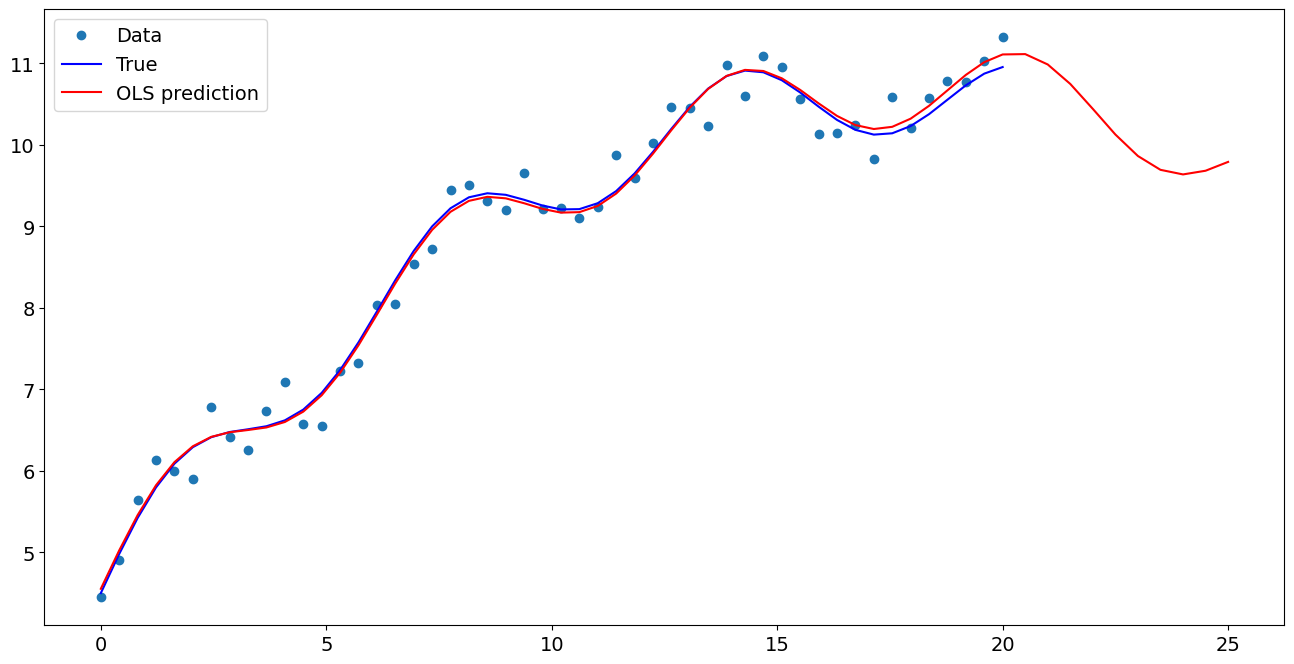

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.016911
x1                  0.490736
np.sin(x1)          0.500630
I((x1 - 5) ** 2)   -0.018567
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.115317
1    10.988067
2    10.748983
3    10.442806
4    10.128431
5     9.864485
6     9.694979
7     9.638526
8     9.683788
9     9.792250
dtype: float64